# OneCredit desarrollar y evaluar modelos 


# 1. Carga de librerías

In [80]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy as sp
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

#linear regression estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import svm


#Clasiffiers estimators
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import GradientBoostingClassifier


#
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



### para el preprocesamiento de los datos y estandarizar o remover media varianza y escala de varianza
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
#cross validation
from sklearn.model_selection import train_test_split

# 2. Carga de datos

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPaymentNextMonth
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                         30000 non-null int64
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null int64
EDUCATION                  30000 non-null int64
MARRIAGE                   30000 non-null int64
AGE                        30000 non-null int64
PAY_0                      30000 non-null int64
PAY_2                      30000 non-null int64
PAY_3                      30000 non-null int64
PAY_4                      30000 non-null int64
PAY_5                      30000 non-null int64
PAY_6                      30000 non-null int64
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1                   

## 2.1 Definición de features y conjuntos de entrenamiento y pruebas 

In [5]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [6]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [7]:
#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [8]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [9]:
#Testing Set (X Testing)
X_test = features[21000:30000]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
21000          0        780          0       1170        780          0   
21001     178220     184848     188411     191291     189029     192023   
21002     128602     118109      21557      23186      14117      15797   
21003     160106     162743      81890          0          0          0   
21004      79237      65301      67253      67352      74448      72928   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
21000       780         0      1170         0         0  
21001     10000      9000      8000      6738      6974  
21002      3203      6015      5055      2011      4078  
21003      7600      4000         0         0         0  
21004      3000      4005      2500     10000         0  


In [10]:
#Ground Truth (y_test) 
y_test = depVar[21000:30000]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000       0
21001    7600
21002    4522
21003       0
21004    5000
Name: PAY_AMT6, dtype: int64

## 2.2 Cross Validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [12]:
X_train.shape, X_test.shape

((15750, 11), (5250, 11))

# 3. Ejercicio/práctica Regresión

In [13]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [14]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()


Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [15]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


## 3.1 Random Forest Regression Model Fitting and Scoring

In [16]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.0443492   0.07099123 -0.08129636]


0.8350589296087291

## 3.2 Support Vector Regression Model Fitting and Scoring

In [17]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of g

[-0.05260514 -0.04044645 -0.04190507]


-0.04470843414021197

##  3.3 Linear Regression Model Fitting and Scoring

In [18]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.14249443 0.11435805 0.04150906]


C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.12334858265790305

# 4. Modelado Enfoque con Clasificación

## 4.1 Cambio de tipos de datos

In [19]:
credit = rawData

In [20]:
credit['SEX']=credit['SEX'].astype('category')
credit['EDUCATION']=credit['EDUCATION'].astype('category')
credit['MARRIAGE']=credit['MARRIAGE'].astype('category')
credit['PAY_0']=credit['PAY_0'].astype('category')
credit['PAY_2']=credit['PAY_2'].astype('category')
credit['PAY_3']=credit['PAY_3'].astype('category')
credit['PAY_4']=credit['PAY_4'].astype('category')
credit['PAY_5']=credit['PAY_5'].astype('category')
credit['PAY_6']=credit['PAY_6'].astype('category')
credit['defaultPaymentNextMonth']=credit['defaultPaymentNextMonth'].astype('category')


In [21]:
#dependent variable
depVar = credit['defaultPaymentNextMonth']

#features extended
featuresExt = credit.iloc[:,1:24]
print('Summary of feature sample')
featuresExt.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
#Training Set (Feature Space: X Training)
X_train = (featuresExt[: 21000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [23]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: defaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [24]:
#Testing Set (X Testing)
X_test = featuresExt[21000:30000]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())


The number of observations in the feature testing set is: 9000
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
21000      30000   1         2        1   36     1    -1    -1    -1     0   
21001     280000   1         3        1   40     2     0     0     0     0   
21002     260000   1         2        1   37     0     0     0     0     0   
21003     200000   1         2        2   32     2     0     0     0    -2   
21004      80000   1         2        2   32     2     0     0     0     0   

       ... BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
21000  ...         0       1170        780          0       780         0   
21001  ...    188411     191291     189029     192023     10000      9000   
21002  ...     21557      23186      14117      15797      3203      6015   
21003  ...     81890          0          0          0      7600      4000   
21004  ...     67253      67352      74448      72928      3000      4005   

     

In [25]:
#Ground Truth (y_test) 
y_test = depVar[21000:30000]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: defaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

## 4.2 Cross validation 

In [26]:
#features extended
creditWithoutID = credit.iloc[:,1:25]
print('Summary of feature sample')
creditWithoutID.head()


Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPaymentNextMonth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# se realiza el split de los conjunto de entrenamiento y pruebas con la función train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(creditWithoutID.drop('defaultPaymentNextMonth', axis=1), creditWithoutID['defaultPaymentNextMonth'], test_size=.3, random_state=100)

In [28]:
# Split the training data as default and no default
xtrain_default = xtrain.loc[ytrain == 1, :]
xtrain_no_default = xtrain.loc[ytrain == 0, :]

## 4.4 Preprocesamiento de los datos 

In [29]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4636 to 5640
Data columns (total 23 columns):
LIMIT_BAL    21000 non-null int64
SEX          21000 non-null category
EDUCATION    21000 non-null category
MARRIAGE     21000 non-null category
AGE          21000 non-null int64
PAY_0        21000 non-null category
PAY_2        21000 non-null category
PAY_3        21000 non-null category
PAY_4        21000 non-null category
PAY_5        21000 non-null category
PAY_6        21000 non-null category
BILL_AMT1    21000 non-null int64
BILL_AMT2    21000 non-null int64
BILL_AMT3    21000 non-null int64
BILL_AMT4    21000 non-null int64
BILL_AMT5    21000 non-null int64
BILL_AMT6    21000 non-null int64
PAY_AMT1     21000 non-null int64
PAY_AMT2     21000 non-null int64
PAY_AMT3     21000 non-null int64
PAY_AMT4     21000 non-null int64
PAY_AMT5     21000 non-null int64
PAY_AMT6     21000 non-null int64
dtypes: category(9), int64(14)
memory usage: 2.6 MB


In [30]:
## Se experimenta con el preprocesamiento de los conjuntos de entrenamiento y pruebas para eliminar varianza y estandarizar
## los datos

X_scaled = preprocessing.scale(xtrain)
X_scaled

array([[-0.6013568 ,  0.80552427,  1.45773666, ..., -0.30323782,
        -0.2638993 , -0.29130341],
       [-1.13641719,  0.80552427,  1.45773666, ..., -0.20944742,
        -0.08514033,  0.52633401],
       [-1.13641719, -1.24142753,  1.45773666, ..., -0.30323782,
        -0.3140547 , -0.29130341],
       ...,
       [-0.52491961,  0.80552427,  0.18793121, ..., -0.09509503,
        -0.06417795, -0.1424934 ],
       [-0.677794  ,  0.80552427, -1.08187424, ..., -0.30323782,
        -0.02958359, -0.29130341],
       [ 0.31588958, -1.24142753,  0.18793121, ...,  0.81190291,
        -0.15928029, -0.26421236]])

In [31]:
X_scaled.mean(axis=0)

array([ 2.09779284e-17,  2.10455991e-16, -6.83474441e-17,  2.18238126e-17,
        1.67992604e-16, -1.13348484e-17,  4.39859789e-17,  3.29894842e-18,
        1.69176842e-17,  2.26696968e-17, -3.65421978e-17, -1.55642694e-17,
        2.09779284e-17, -2.36847579e-17,  6.36104925e-17,  4.06024420e-18,
       -2.97751242e-17,  1.01506105e-17,  6.76707367e-18,  2.87600631e-17,
       -1.50567389e-17, -1.45492084e-17, -2.67299410e-17])

In [32]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [33]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaler.mean_


array([ 1.68673318e+05,  1.60647619e+00,  1.85200000e+00,  1.54995238e+00,
        3.55198571e+01, -2.57619048e-02, -1.45428571e-01, -1.76761905e-01,
       -2.34095238e-01, -2.77571429e-01, -3.03190476e-01,  5.11144211e+04,
        4.90195612e+04,  4.68299196e+04,  4.31634222e+04,  4.01653472e+04,
        3.88377546e+04,  5.65164819e+03,  5.91873686e+03,  5.25952467e+03,
        4.80768433e+03,  4.88407410e+03,  5.34411843e+03])

In [35]:
scaler.scale_

array([1.30826354e+05, 4.88531290e-01, 7.87522214e-01, 5.21883035e-01,
       9.24390589e+00, 1.12852754e+00, 1.19848836e+00, 1.19824991e+00,
       1.16572454e+00, 1.12945491e+00, 1.14610284e+00, 7.35079726e+04,
       7.09874316e+04, 6.92174230e+04, 6.41478374e+04, 6.06453631e+04,
       5.96573075e+04, 1.71213192e+04, 2.49317730e+04, 1.82538812e+04,
       1.58545012e+04, 1.55516671e+04, 1.83455399e+04])

In [36]:
X_train_transform = scaler.transform(xtrain)
X_test_transform = scaler.transform(xtest)


In [39]:
X_train_transform

array([[-0.6013568 ,  0.80552427,  1.45773666, ..., -0.30323782,
        -0.2638993 , -0.29130341],
       [-1.13641719,  0.80552427,  1.45773666, ..., -0.20944742,
        -0.08514033,  0.52633401],
       [-1.13641719, -1.24142753,  1.45773666, ..., -0.30323782,
        -0.3140547 , -0.29130341],
       ...,
       [-0.52491961,  0.80552427,  0.18793121, ..., -0.09509503,
        -0.06417795, -0.1424934 ],
       [-0.677794  ,  0.80552427, -1.08187424, ..., -0.30323782,
        -0.02958359, -0.29130341],
       [ 0.31588958, -1.24142753,  0.18793121, ...,  0.81190291,
        -0.15928029, -0.26421236]])

In [ ]:
#Análisis de covarianza

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = creditWithoutID

df = pd.DataFrame(data,columns=['LIMIT_BAL', 'SEX', 'EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

covMatrix = pd.DataFrame.cov(df)
sn.heatmap(covMatrix, annot=False, fmt='g')
plt.show()

In [ ]:
df = pd.DataFrame(data,columns=['LIMIT_BAL', 'SEX', 'EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

covMatrix = pd.DataFrame.cov(df)
print (covMatrix)

In [ ]:
df = pd.DataFrame(data,columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

covMatrix = pd.DataFrame.cov(df)
print (covMatrix)

## 4.5 Ejecución de modelos y evaluación 

### 4.5.1 Random Forest 

In [37]:
## Random forest con los datos normalizados, posteriormemte se prueba sin normalizar para ver comparación

# 100 Estimators
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X_train_transform, ytrain)  
RF.predict(X_test_transform)  
round(RF.score(X_test_transform, ytest), 4)

0.8172

In [35]:
# Un estimator
RF = RandomForestClassifier(n_estimators=1, max_depth=10, random_state=0).fit(X_train_transform, ytrain)  
RF.predict(X_test_transform)  
round(RF.score(X_test_transform, ytest), 4)

0.7992

In [39]:
# Prueba con los datos sin normalizar
RF = RandomForestClassifier(n_estimators=1, max_depth=10, random_state=0).fit(xtrain, ytrain)  
RF.predict(xtest)  
round(RF.score(xtest, ytest), 4)

0.7993

NOTA: en el caso de RandomForest el resultado es muy similar para el set de datos con y sin normalizar

In [42]:
# Un estimator
RF = RandomForestClassifier(n_estimators=50, max_depth=100, random_state=1).fit(X_train_transform, ytrain)  
RF.predict(X_test_transform)  
round(RF.score(X_test_transform, ytest), 4)

0.8103

In [43]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=50, max_depth=100, random_state=1).fit(xtrain, ytrain)  
RF.predict(xtest)  
round(RF.score(xtest, ytest), 4)

0.8107

In [44]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0).fit(xtrain, ytrain)  
RF.predict(xtest)  
round(RF.score(xtest, ytest), 4)

0.8147

MEJOR VALOR DE RF:0.8371

In [45]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_train, y_train)  
RF.predict(X_test)  
round(RF.score(X_test, y_test), 4)

0.8371

In [48]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_train_transform, y_train)  
RF.predict(X_test_transform)  
round(RF.score(X_test_transform, y_test), 4)

0.7952

In [46]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=0).fit(xtrain, ytrain)  
RF.predict(xtest)  
round(RF.score(xtest, ytest), 4)

0.8063

In [47]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0).fit(xtrain, ytrain)  
RF.predict(xtest)  
round(RF.score(xtest, ytest), 4)

0.7697

### 4.5.2 Support Vector Machine 

In [38]:
# con valores sin normalizar
clfSVM = svm.SVC()
clfSVM.fit(xtrain, ytrain)
clfSVM.predict(xtest)
round(clfSVM.score(xtest, ytest), 4)

C:\Users\infoslenovo3\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.77

In [40]:
#Con valores normalizados
clfSVM = svm.SVC()
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8177

In [42]:
#Con parametros y datos sin normalizar
clfSVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(xtrain, ytrain)
clfSVM.predict(xtest)
round(clfSVM.score(xtest, ytest), 4)

0.7697

In [46]:
#Con parametros y datos normalizados
clfSVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8177

MEJOR VALOR DE SVM: 0.8178

In [47]:
#Con parametros y datos normalizados, se varia shrinking y probability
clfSVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=False, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8178

In [48]:
#Con parametros y datos normalizados, se varia shrinking y probability
clfSVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8177

In [49]:
#Con parametros y datos normalizados se cambia el kernel
clfSVM = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='scale', coef0=0.0, shrinking=False, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8017

In [50]:
#Con parametros y datos normalizados se cambia el kernel
clfSVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=False, probability=False, tol=0.001, 
cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
decision_function_shape='ovr', random_state=None)
clfSVM.fit(X_train_transform, ytrain)
clfSVM.predict(X_test_transform)
round(clfSVM.score(X_test_transform, ytest), 4)

0.8051

### 4.5.3 Nearest Neighbors Classification 

In [59]:
# Sin normalizar
clfKNN = neighbors.KNeighborsClassifier()
clfKNN.fit(xtrain, ytrain)
clfKNN.predict(xtest)
round(clfKNN.score(xtest, ytest), 4)

0.7483

In [60]:
#Normalizados
clfKNN = neighbors.KNeighborsClassifier()
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.7894

Parámetros
n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

In [62]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.7894

In [63]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.7818

In [64]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.8057

MEJOR VALOR DE KNN: 0.8088

In [66]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.8088

In [65]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.8058

In [67]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.8078

In [69]:
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clfKNN.fit(X_train_transform, ytrain)
clfKNN.predict(X_test_transform)
round(clfKNN.score(X_test_transform, ytest), 4)

0.8067

### 4.5.4 Gradient Boosting 

MEJOR VALOR DE GB: 0.8186

In [71]:
clfGB = GradientBoostingClassifier()
clfGB.fit(X_train_transform, ytrain)
clfGB.predict(X_test_transform)
round(clfGB.score(X_test_transform, ytest), 4)

0.8186

In [74]:
clfGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                   criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                   min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                   verbose=0, max_leaf_nodes=None, warm_start=False,
                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
clfGB.fit(X_train_transform, ytrain)
clfGB.predict(X_test_transform)
round(clfGB.score(X_test_transform, ytest), 4)

0.8184

In [75]:
clfGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                   criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0, 
                                   min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                   verbose=0, max_leaf_nodes=None, warm_start=False,
                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
clfGB.fit(X_train_transform, ytrain)
clfGB.predict(X_test_transform)
round(clfGB.score(X_test_transform, ytest), 4)

0.8098

In [76]:
clfGB = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                   criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                   min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                   verbose=0, max_leaf_nodes=None, warm_start=False,
                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
clfGB.fit(X_train_transform, ytrain)
clfGB.predict(X_test_transform)
round(clfGB.score(X_test_transform, ytest), 4)


0.8181

## 4.6 Predicciones

In [82]:
# Prueba con los datos sin normalizar, se varian los parámetros
RF = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_train, y_train)  
RF.predict(X_test)  
round(RF.score(X_test, y_test), 4)

0.8371

In [88]:

predictions = RF.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))


Confusion Matrix:
[[6651  276]
 [1361  712]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6927
           1       0.72      0.34      0.47      2073

    accuracy                           0.82      9000
   macro avg       0.78      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



### 4.6.1 Se comparan las predicciones de los diferentes modelos 

#### NOTA: Se intentó realizar un gráfico comparativo 

In [107]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler


In [108]:
h = .02  # step size in the mesh

names = ["Random Forest", "SVM", "Nearest Neighbors", "Gradient Boosting"]

In [118]:
classifiers = [
    RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0),
    svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=False, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None),
    neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None),
    GradientBoostingClassifier()
]

ValueError: Number of features of the model must match the input. Model n_features is 23 and input n_features is 2 

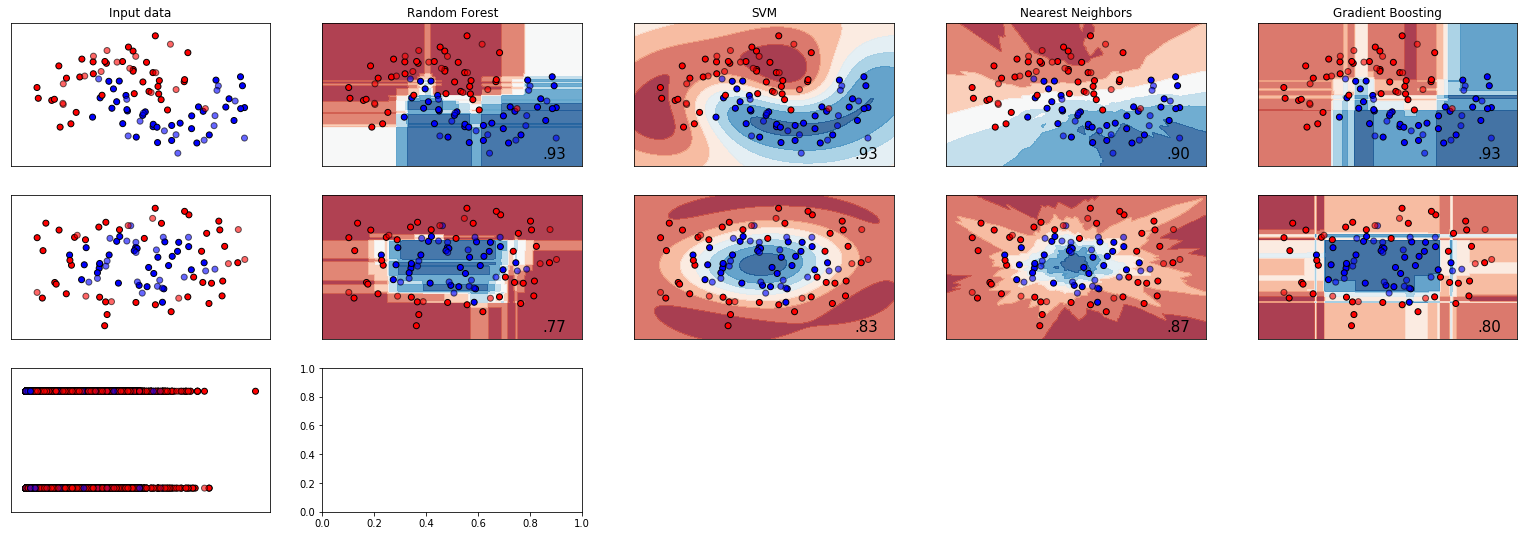

In [119]:


X = xtrain
y = ytrain
rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()